## Lab-1



### Time series plots, Decomposition of time series

##### The dataset contains mean temperature values, recorded in degrees Celsius, starting from the year 1901. It provides average temperatures for the whole year (ANNUAL) and for four specific seasons: January–February (winter), March–May (spring), June–September (summer/monsoon), and October–December (autumn/winter).

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\shrad\\Downloads\\TEMP_ANNUAL_SEASONAL_MEAN.csv")
df.head()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13


In [2]:
df.dtypes

YEAR       float64
ANNUAL      object
JAN-FEB     object
MAR-MAY     object
JUN-SEP     object
OCT-DEC     object
dtype: object

In [3]:
df.columns

Index(['YEAR', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC'], dtype='object')

In [4]:
df.shape

(123, 6)

In [5]:
df.isnull().sum()

YEAR       2
ANNUAL     1
JAN-FEB    1
MAR-MAY    1
JUN-SEP    1
OCT-DEC    1
dtype: int64

In [6]:
df.dropna()

,YEAR,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901.0,25.42,20.11,27.64,28.16,23.1
1,1902.0,25.42,20.88,27.96,27.98,22.51
2,1903.0,25.01,19.99,27.02,28,22.33
3,1904.0,24.93,19.76,27.23,27.57,22.56
4,1905.0,24.84,18.36,26.38,28.2,23.13
...,...,...,...,...,...,...
116,2017.0,26.04,21.37,28.2,28.39,23.84
117,2018.0,25.9,21.24,28.16,28.28,23.55
118,2019.0,25.86,20.71,28,28.6,23.49
119,2020.0,25.78,20.79,27.58,28.45,23.75


In [7]:
for col in df.columns:
    if col != 'YEAR':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Converting year to datetime
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Set 'YEAR' as the index
df.set_index('YEAR', inplace=True)

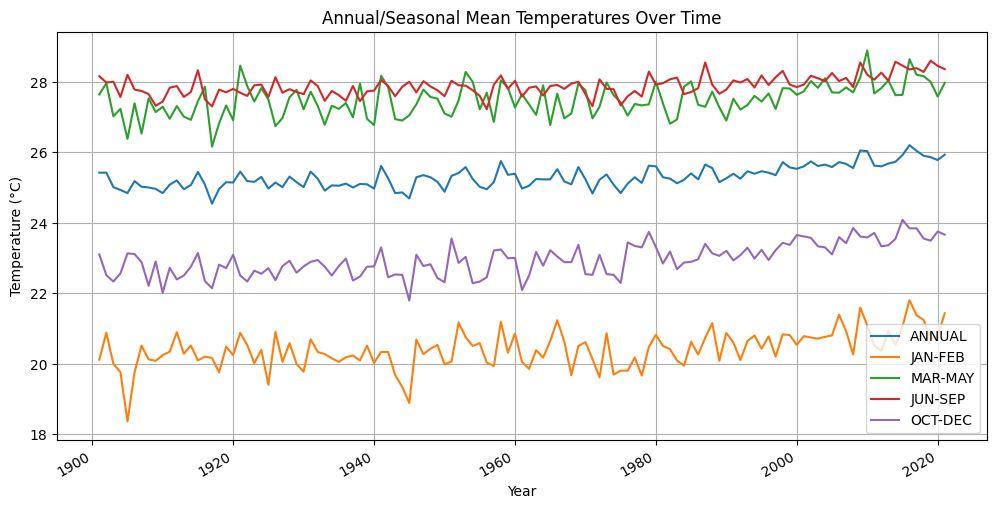

In [9]:
import matplotlib.pyplot as plt
df.plot(figsize=(12, 6), title='Annual/Seasonal Mean Temperatures Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


1. Long-Term Trend

The annual average temperature (ANNUAL) exhibits a steady increase from 1901 to recent years.
This reflects a persistent warming trend over time, likely driven by long-term climate change.

2. Seasonal Variation

The highest average temperatures consistently occur during the JUN–SEP period, corresponding to the summer/monsoon season.
JAN–FEB records the lowest temperatures, typical of winter months.
While the temperature differences between seasons have remained relatively stable, there is a noticeable overall increase in seasonal temperatures, indicating a year-round warming effect.

3. Fluctuations and Anomalies

Irregular temperature changes, including sharp rises and falls, are observed occasionally—particularly in the early decades and around the mid-20th century.


Post-1980, seasonal temperatures show greater year-to-year variability, possibly due to increased climate instability.



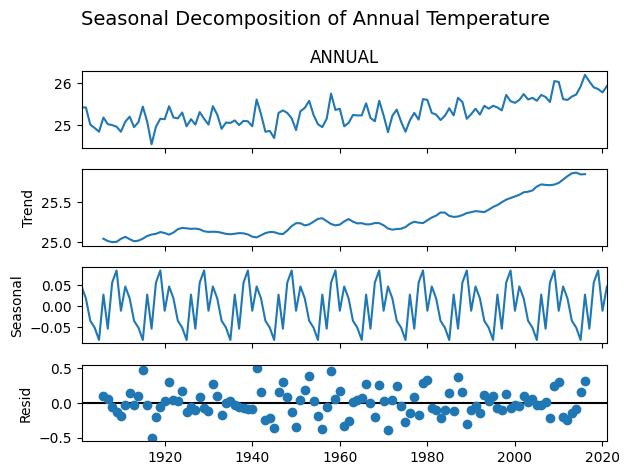

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
annual_temp = df['ANNUAL'].dropna()
#Decomposition
result = seasonal_decompose(annual_temp, model='additive', period=10)
#Plot decomposition
result.plot()
plt.suptitle("Seasonal Decomposition of Annual Temperature", fontsize=14)
plt.tight_layout()
plt.show()


Trend Component:
The trend line clearly shows a consistent increase in annual mean temperatures.
The most noticeable rise begins in the 1980s, aligning with global warming trends.

Seasonal Component:
As the dataset is based on annual data, it does not capture true intra-year seasonal patterns.
The seasonal component remains mostly flat, indicating little to no cyclical variation in the annual averages.

Residual (Irregular) Component:
The residuals exhibit minor, irregular variations around the main trend.
These deviations likely reflect short-term anomalies or external factors not explained by the trend or seasonality—such as volcanic eruptions, El Niño events, or measurement errors.